In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("TimeSeriesData.csv")
data.head()

,Date,Type,Pos,Neg,Neu
0,01-Mar-21,Politics,314,311,375
1,01-Mar-21,Entertainment,693,64,243
2,01-Mar-21,Social,670,30,300
3,01-Mar-21,Song,106,82,812
4,01-Mar-21,Entertainment,420,76,504


In [3]:
data = data[data.Type=="Politics"]
data.head()

,Date,Type,Pos,Neg,Neu
0,01-Mar-21,Politics,314,311,375
5,02-Mar-21,Politics,815,3,182
6,02-Mar-21,Politics,328,395,277
12,03-Mar-21,Politics,289,124,587
14,03-Mar-21,Politics,93,505,402


In [4]:
data["Date"] = pd.to_datetime(data["Date"])

In [5]:
data = data[data.Date>"17-Mar-21"]
data.head()

,Date,Type,Pos,Neg,Neu
60,2021-03-18,Politics,209,297,494
62,2021-03-18,Politics,443,2,508
63,2021-03-18,Politics,584,157,259
67,2021-03-19,Politics,654,121,225
71,2021-03-20,Politics,605,110,285


In [6]:
data.reset_index(inplace=True)

In [7]:
data.head()

,index,Date,Type,Pos,Neg,Neu
0,60,2021-03-18,Politics,209,297,494
1,62,2021-03-18,Politics,443,2,508
2,63,2021-03-18,Politics,584,157,259
3,67,2021-03-19,Politics,654,121,225
4,71,2021-03-20,Politics,605,110,285


In [8]:
del data["index"]

In [9]:
data.head()

,Date,Type,Pos,Neg,Neu
0,2021-03-18,Politics,209,297,494
1,2021-03-18,Politics,443,2,508
2,2021-03-18,Politics,584,157,259
3,2021-03-19,Politics,654,121,225
4,2021-03-20,Politics,605,110,285


In [10]:
data.to_csv(r'C:\Users\asus\Desktop\Hashtag WD\PoliticsData1.csv',index=False)

In [3]:
data = pd.read_csv("PoliticsData.csv")
data.head()

,Date,Type,Pos,Neg,Neu
0,18-03-2021,Politics,412,152,429
1,19-03-2021,Politics,654,121,225
2,20-03-2021,Politics,605,110,285
3,21-03-2021,Politics,296,505,198
4,22-03-2021,Politics,265,287,447


# Pos Time Series 

In [3]:
data1 = data.iloc[:,[0,2]]

In [4]:
data1.set_index('Date',inplace=True)
data1.head()

,Pos
Date,
18-03-2021,412
19-03-2021,654
20-03-2021,605
21-03-2021,296
22-03-2021,265


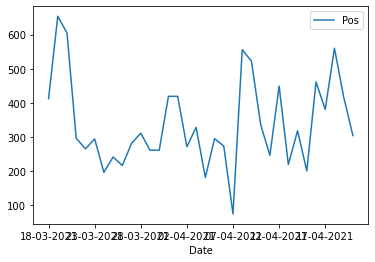

In [5]:
data1.plot();

In [7]:
from statsmodels.tsa.stattools import adfuller

In [6]:
# H0: It is non stationary
# H1: It is stationary
def adfuller_test(Pos):
    result = adfuller(Pos)
    labels = ["ADF Test statistics","P-value","#Lags Used","Number of Observation Used"]
    for value,labels in zip(result,labels):
        print(labels+' : '+str(value) )
    if result[1] <= 0.05:
        print("Strong evidence against null hypothesis")
    else:
        print("weak evidence against null hypothesis")

In [8]:
adfuller_test(data1["Pos"])

ADF Test statistics : -4.258924073944769
P-value : 0.0005228721166439274
#Lags Used : 0
Number of Observation Used : 33
Strong evidence against null hypothesis


In [9]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
import statsmodels.api as sm

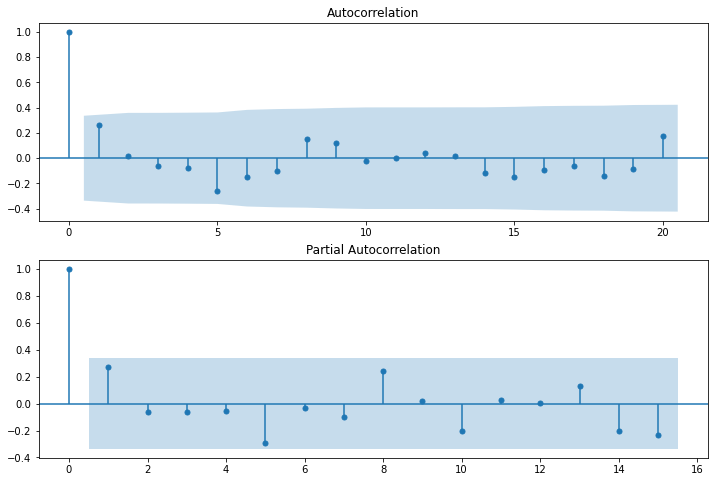

In [10]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data1['Pos'].iloc[0:],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data1['Pos'].iloc[0:],lags=15,ax=ax2)

In [11]:
import pmdarima as pm

In [12]:
def arimamodel(df):
    automodel=pm.auto_arima(df,start_p=0,start_q=0,max_p=4,max_q=4,test="adf",seasonal=False,trace=True)
    return automodel

In [13]:
arimamodel(data1["Pos"])

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=499.292, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=445.288, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=477.587, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=443.808, Time=0.09 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=443.513, Time=0.12 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=444.436, Time=0.21 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.37 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.27 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=445.725, Time=0.32 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=434.676, Time=0.34 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=432.896, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=430.998, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=431.414, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=432.942, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=430.994, Time

ARIMA(order=(0, 0, 1), scoring_args={}, suppress_warnings=True)

In [14]:
from statsmodels.tsa.arima_model import ARIMA

In [214]:
#data1['Pos_First_Difference'] = data1['Pos']-data1['Pos'].shift(2)
#data1['Pos'].shift(2)

In [15]:
model = ARIMA(data1['Pos'],order=(0,0,1))
model_fit1=model.fit()

C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency i

In [16]:
model_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    Pos   No. Observations:                   34
Model:                     ARMA(0, 1)   Log Likelihood                -212.497
Method:                       css-mle   S.D. of innovations            125.209
Date:                Wed, 05 May 2021   AIC                            430.994
Time:                        09:10:10   BIC                            435.573
Sample:                             0   HQIC                           432.555
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        338.6595     26.790     12.641      0.000     286.151     391.167
ma.L1.Pos      0.2550      0.152      1.674      0.094      -0.044       0.553
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -3.9219           +0.0000j            3.9219            0.5000
-----------------------------------------------------------------------------
"""

<ipython-input-17-775a41f2f878>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['forecast']=model_fit1.predict(start=1,end=33, dynamic=False)


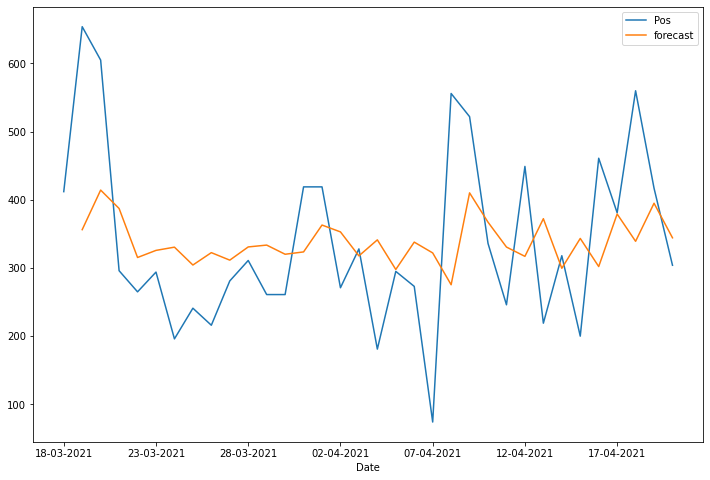

In [17]:
data1['forecast']=model_fit1.predict(start=1,end=33, dynamic=False)
#pd.Series(model_fit1.fittedvalues,copy=True)
data1[['Pos','forecast']].plot(figsize=(12,8));

In [18]:
Positive = model_fit1.forecast(steps=10)[0]

In [19]:
Positive

array([328.39021182, 338.65947277, 338.65947277, 338.65947277,
       338.65947277, 338.65947277, 338.65947277, 338.65947277,
       338.65947277, 338.65947277])

# Neg Time Series

In [20]:
data2 = data.iloc[:,[0,3]]

In [21]:
data2.set_index('Date',inplace=True)
data2.head()

,Neg
Date,
18-03-2021,152
19-03-2021,121
20-03-2021,110
21-03-2021,505
22-03-2021,287


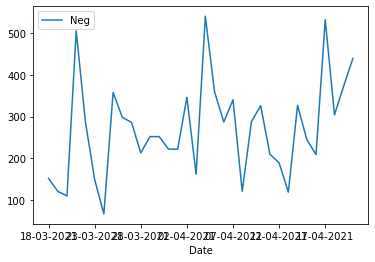

In [22]:
data2.plot();

In [35]:
from statsmodels.tsa.stattools import adfuller

In [23]:
# H0: It is non stationary
# H1: It is stationary
def adfuller_test(Neg):
    result = adfuller(Neg)
    labels = ["ADF Test statistics","P-value","#Lags Used","Number of Observation Used"]
    for value,labels in zip(result,labels):
        print(labels+' : '+str(value) )
    if result[1] <= 0.05:
        print("Strong evidence against null hypothesis")
    else:
        print("weak evidence against null hypothesis")

In [24]:
adfuller_test(data2["Neg"])

ADF Test statistics : -2.120314599342937
P-value : 0.2364248419024263
#Lags Used : 3
Number of Observation Used : 30
weak evidence against null hypothesis


In [25]:
data2['Neg_First_Difference'] = data2['Neg']-data2['Neg'].shift(1)
#data2['Neg'].shift(1)

<ipython-input-25-0fa6d72db0bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Neg_First_Difference'] = data2['Neg']-data2['Neg'].shift(1)


In [26]:
# Again test dickey fuller test
adfuller_test(data2['Neg_First_Difference'].dropna())

ADF Test statistics : -6.793482182083169
P-value : 2.332542600424232e-09
#Lags Used : 1
Number of Observation Used : 31
Strong evidence against null hypothesis


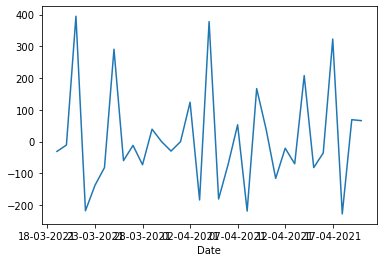

In [27]:
data2.Neg_First_Difference.plot();

In [41]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
import statsmodels.api as sm

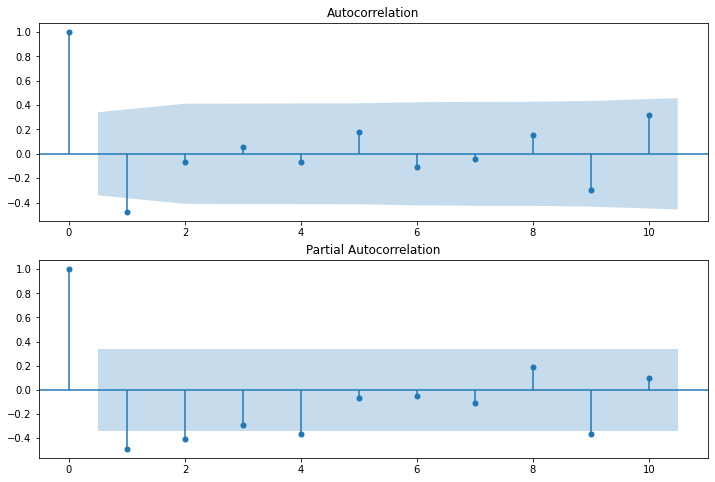

In [42]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data2['Neg_First_Difference'].dropna().iloc[0:],lags=10,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data2['Neg_First_Difference'].dropna().iloc[0:],lags=10,ax=ax2)

In [43]:
def arimamodel(df):
    automodel=pm.auto_arima(df,start_p=0,start_q=0,max_p=4,max_q=4,test="adf",seasonal=False,trace=True)
    return automodel

In [44]:
arimamodel(data2["Neg"])

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=433.572, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=427.346, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=431.667, Time=0.00 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=424.364, Time=0.16 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=424.394, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=422.851, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=425.592, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=423.066, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=420.123, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=418.242, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=416.249, Time=0.04 se

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [45]:
from statsmodels.tsa.arima_model import ARIMA

In [46]:
model = ARIMA(data2['Neg'],order=(0,1,1))
model_fit2=model.fit()

C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency i

In [47]:
model_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.Neg   No. Observations:                   33
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -204.722
Method:                       css-mle   S.D. of innovations            113.446
Date:                Sat, 01 May 2021   AIC                            415.444
Time:                        08:57:28   BIC                            419.933
Sample:                             1   HQIC                           416.954
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.6785      1.983      1.855      0.064      -0.208       7.565
ma.L1.D.Neg    -1.0000      0.089    -11.207      0.000      -1.175      -0.825
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

<ipython-input-48-de8c313b82e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['forecast']=model_fit2.predict(start=2,end=33, dynamic=False)


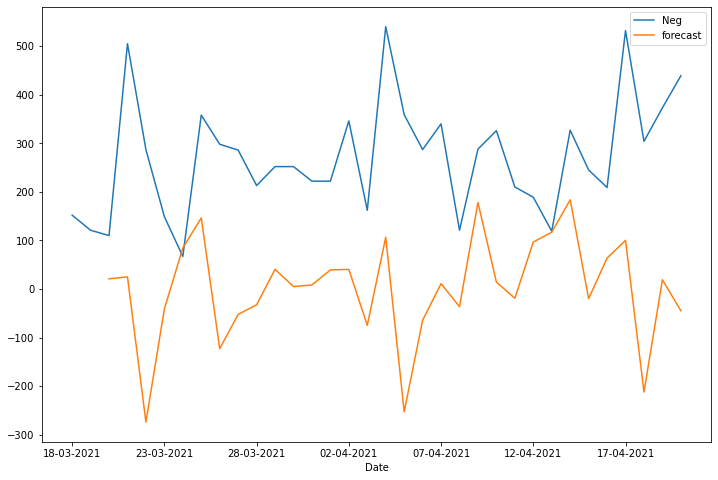

In [48]:
data2['forecast']=model_fit2.predict(start=2,end=33, dynamic=False)
#pd.Series(model_fit3.fittedvalues,copy=True)
data2[['Neg','forecast']].plot(figsize=(12,8));

In [67]:
Negative = model_fit2.forecast(steps=10)[0]

In [68]:
Negative

array([332.00156835, 335.68010632, 339.35864429, 343.03718225,
       346.71572022, 350.39425819, 354.07279615, 357.75133412,
       361.42987209, 365.10841006])

# Neu Time Series

In [50]:
data3 = data.iloc[:,[0,4]]

In [51]:
data3.set_index('Date',inplace=True)
data3.head()

,Neu
Date,
18-03-2021,429
19-03-2021,225
20-03-2021,285
21-03-2021,198
22-03-2021,447


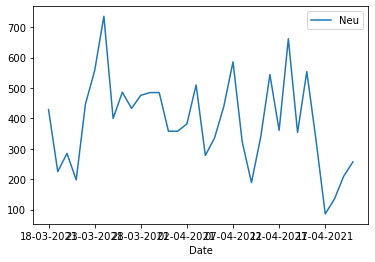

In [52]:
data3.plot();

In [53]:
from statsmodels.tsa.stattools import adfuller

In [54]:
# H0: It is non stationary
# H1: It is stationary
def adfuller_test(Neg):
    result = adfuller(Neg)
    labels = ["ADF Test statistics","P-value","#Lags Used","Number of Observation Used"]
    for value,labels in zip(result,labels):
        print(labels+' : '+str(value) )
    if result[1] <= 0.05:
        print("Strong evidence against null hypothesis")
    else:
        print("weak evidence against null hypothesis")

In [55]:
adfuller_test(data3["Neu"])

ADF Test statistics : -3.825871416919999
P-value : 0.0026534355194658263
#Lags Used : 0
Number of Observation Used : 33
Strong evidence against null hypothesis


In [56]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
import statsmodels.api as sm

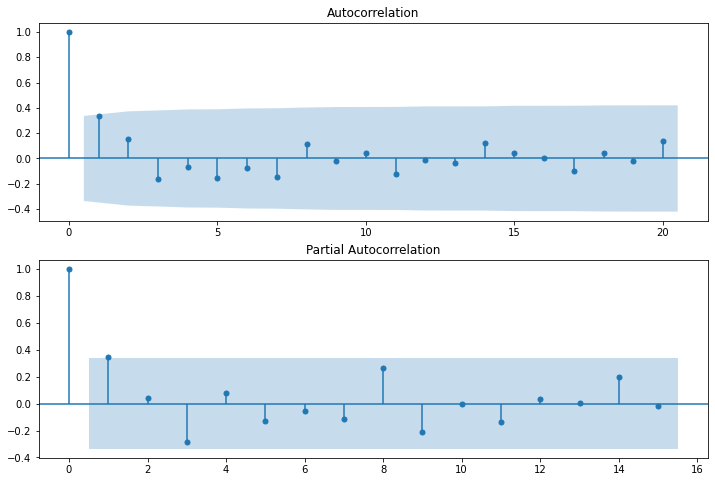

In [57]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data3['Neu'].iloc[0:],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data3['Neu'].iloc[0:],lags=15,ax=ax2)

In [58]:
def arimamodel(df):
    automodel=pm.auto_arima(df,start_p=0,start_q=0,max_p=4,max_q=4,test="adf",seasonal=False,trace=True)
    return automodel

In [59]:
arimamodel(data3["Neu"])

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=436.001, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=433.139, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=430.646, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=434.032, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=428.812, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=429.160, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=431.182, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.15 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.305 seconds


ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [60]:
from statsmodels.tsa.arima_model import ARIMA

In [61]:
model = ARIMA(data3['Neu'],order=(0,1,1))
model_fit3=model.fit()

C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency i

In [62]:
model_fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.Neu   No. Observations:                   33
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -212.367
Method:                       css-mle   S.D. of innovations            143.022
Date:                Sat, 01 May 2021   AIC                            430.734
Time:                        08:58:50   BIC                            435.223
Sample:                             1   HQIC                           432.245
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.8067      2.500     -1.523      0.128      -8.707       1.093
ma.L1.D.Neu    -1.0000      0.148     -6.745      0.000      -1.291      -0.709
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

<ipython-input-63-dcbe9cf09293>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['forecast']=model_fit3.predict(start=1,end=33, dynamic=False)


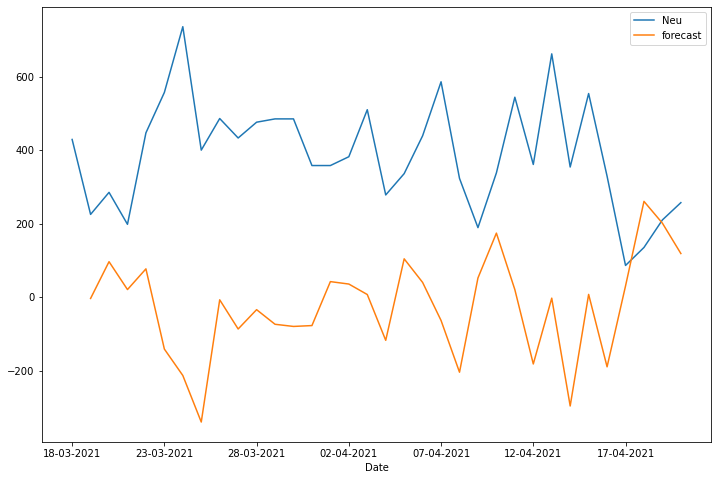

In [63]:
data3['forecast']=model_fit3.predict(start=1,end=33, dynamic=False)
#pd.Series(model_fit3.fittedvalues,copy=True)
data3[['Neu','forecast']].plot(figsize=(12,8));

In [69]:
Neutral = model_fit3.forecast(steps=10)[0]

In [94]:
Neutral

array([324.63050974, 320.82378754, 317.01706533, 313.21034313,
       309.40362093, 305.59689872, 301.79017652, 297.98345431,
       294.17673211, 290.37000991])

In [117]:
D = list(zip(Positive,Negative,Neutral))

In [120]:
df = pd.DataFrame(D,columns=['Positive','Negative','Neutral'])

In [121]:
df

,Positive,Negative,Neutral
0,328.391188,332.001568,324.630510
1,338.660653,335.680106,320.823788
2,338.660653,339.358644,317.017065
3,338.660653,343.037182,313.210343
4,338.660653,346.715720,309.403621
5,338.660653,350.394258,305.596899
6,338.660653,354.072796,301.790177
7,338.660653,357.751334,297.983454
8,338.660653,361.429872,294.176732
9,338.660653,365.108410,290.370010


In [124]:
df.to_csv(r'C:\Users\asus\Desktop\Hashtag WD\Politics_Pred.csv',index=False)

In [2]:
Sentiment = pd.read_csv("Politics_Pred.csv")

In [3]:
Sentiment

,Positive,Negative,Neutral,Sentiment
0,328.391188,332.001568,324.630510,Negative
1,338.660653,335.680106,320.823787,Positive
2,338.660653,339.358644,317.017065,Negative
3,338.660653,343.037182,313.210343,Negative
4,338.660653,346.715720,309.403621,Negative
5,338.660653,350.394258,305.596899,Negative
6,338.660653,354.072796,301.790177,Negative
7,338.660653,357.751334,297.983454,Negative
8,338.660653,361.429872,294.176732,Negative
9,338.660653,365.108410,290.370010,Negative


In [1]:
! pip install keras

In [10]:
#! pip install tensorflow

In [4]:
#pip install tensorflow

In [5]:
Actual_sentiment = pd.read_csv("Politics_Actual_Sentiment.csv")

In [6]:
Actual_sentiment

,Date,Pos,Neg,Neu,Sentiment
0,21-Apr-21,472,156,372,Positive
1,22-Apr-21,367,302,331,Positive
2,23-Apr-21,230,298,472,Neutral
3,24-Apr-21,384,104,512,Neutral
4,25-Apr-21,467,156,377,Positive
5,26-Apr-21,281,267,452,Neutral
6,27-Apr-21,330,102,568,Neutral
7,28-Apr-21,302,306,392,Neutral
8,29-Apr-21,212,427,361,Negative
9,30-Apr-21,522,256,222,Positive


In [7]:
diff_Pos=abs(Sentiment.Positive-Actual_sentiment.Pos)
MAPE_Pos=np.mean(diff_Pos/Actual_sentiment.Pos)*100
print("MAPE for Positive :",MAPE_Pos)

diff_Neg=abs(Sentiment.Negative-Actual_sentiment.Neg)
MAPE_Neg=np.mean(diff_Neg/Actual_sentiment.Neg)*100
print("MAPE for Negative :",MAPE_Neg)

diff_Neu=abs(Sentiment.Neutral-Actual_sentiment.Neu)
MAPE_Neu=np.mean(diff_Neu/Actual_sentiment.Neu)*100
print("MAPE for Neutral :",MAPE_Neu)

MAPE for Positive : 25.48316376070952
MAPE for Negative : 84.32023944506213
MAPE for Neutral : 25.79493731024697


In [8]:
from sklearn.metrics import confusion_matrix

In [9]:
matrix=confusion_matrix(Actual_sentiment.Sentiment,Sentiment.Sentiment,labels=["Positive","Negative","Neutral"])
print("confusion matrix : \n",matrix)

confusion matrix : 
 [[1 3 0]
 [0 1 0]
 [0 5 0]]


In [10]:
dia_sum=np.trace(matrix)
all_sum=np.sum(matrix)

In [11]:
accuracy=(dia_sum/all_sum)*100
accuracy

20.0